<a href="https://colab.research.google.com/github/TheDeas343/MC886/blob/main/MC886_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group information

Names: Andreas Cisi Ramos e João Pedro de Moraes Novaes


RAs: 246932 e 174494

# **Machine Learning MC886/MO444 - Task \#1**: Regression and Classification


### Objective:

To explore **Linear Regression** and **K-Nearest Neighbors** alternatives and come up with the best possible model for the problems. In this work, we will train three models, one for regression, other for binary classification, and the last one for multiclass classification.

## **Linear Regression**

In this section you must load and explore the dataset, and build a linear regressor by hand. No machine learning libraries are allowed. After building your own regressor, you must compare it with the sklearn `SGDRegressor`.


#### **Dataset: Seoul Bike Sharing Demand**

The dataset contains the count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather and date information.

In order to have a good quality of service, the company needs to understand how to distribute and maintain the bicycles available (or even buy more bikes).<br/>
This dataset was collected with the objective to understand which wheater and holiday information impact the number of bikes rented in this system.


Features and the corresponding descriptions:
- **Date** : Date of the sample (year-month-day)
- **Rented Bike count (TARGET)**: Count of bikes rented at this specific hour
- **Hour**: Hour of he day
- **Temperature**:Temperature (in Celsius)
- **Humidity**: Air humidity level (in %)
- **Windspeed**: Average windspeed during this hour (in m/s)
- **Visibility**: Average visibility level during this hour (in 10m)
- **Dew point temperature**: Average temperature where steam condeses into water during this hour (in Celsius)
- **Solar radiation**: Average level of radiation emitted by the sun during this hour (in MJ/m²)
- **Rainfall**: Average rainfall during this hour (in mm)
- **Snowfall**: Average snowfall during this hour (in cm)
- **Seasons**: Season of this date, it can be: Winter, Spring, Summer or Autumn
- **Holiday**: Describes if this date is a Holiday or not (Holiday/No holiday)
- **Functional Day**: Wheter this was a functional day or not (0 = Non Functional Hours, 1 = Functional hours)


**How to load the dataset**

Dataset folder link: [here](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [102]:
#-> Necessário apenas se NÃO for usar localmente

# link with google drive
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

import pandas as pd

# Carregando o dataset localmente
path = "SeoulBikeData.csv" # o arquivo CSV está na mesma pasta que esse scprit do Jupyter, nao sendo necessario adicionar um path
bike_data = pd.read_csv(path)

### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Rented Bike count`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think it can help in understanding the dataset.

Check for the dependencies of the features and the target to understand which has bigger impact in it.

The dataset has categorical features that cannot be used in the models. Fix this (Pandas has a built-in function for that!).

Remember that machine learning models are highly affected by the scale of the input features.


## Analisando os Dados

Vamos analisar os Dados Quantitativos com plot de gráficos normais e Dados Qualitativos com plot de bloxpots. 

Analisando os dados plotados podemos ver que certas features apresentam mais influência que outras para o alvo (Rented Bike Count).

**Sobre os dados quantitativos:**

- A Temperatura, Humidade e Visibilidade se assemelham a um comportamento linear. Já a Radiação Solar e Velocidade do Vento parecem não ter muita influência no número de bicicletas alugadas. Além disso, a quantidade de chuva ou neve parecem forçar um comportamento binário no aluguel de bicicletas, ou seja , se chover ou nevar o número de alugueis de bicicletas é quase nulo.


**Sobre os dados qualitativos:**

- O Horário demonstra ter uma maior atividade no periódo final da tarde-noite (17h - 19h), as Estações Mostram ter uma amior atividade no Verão. Já o Feriado mostra ter uma quantidade maior de bikes alugas quando não é feriado, mas parece não depender muito disso. Agora o Dia de Funcionamento mostra que as bikes só são alugadas caso o estabelecimento esta funcionando.



In [103]:
## Analisando o dataset

import pandas as pd
import matplotlib.pyplot as plt

#bike_data = pd.get_dummies(bike_data, columns=['Seasons', 'Holiday', 'Functioning Day'])

#Colunas
print("COLUNAS")
print(bike_data.columns)

print("DATA\n")
print(bike_data)

print("\nNOT NULL\n")
print(bike_data.isnull().sum())

print("\nDATA TYPES\n")
print(bike_data.dtypes)


COLUNAS
Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')
DATA

            Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0     01/12/2017                256     0            -5.2           37   
1     01/12/2017                206     1            -5.5           38   
2     01/12/2017                175     2            -6.0           39   
3     01/12/2017                109     3            -6.2           40   
4     01/12/2017                 80     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1005    19             4.2           34   
8756  30/11/2018                766    20             3.4           37   
8757  30/11/2018              

## Plotando gráficos : Dados quantitativos 

Plotando gráficos dos dados que apresentam unidades de medida

Text(0.5, 0, 'Snowfall (cm)')

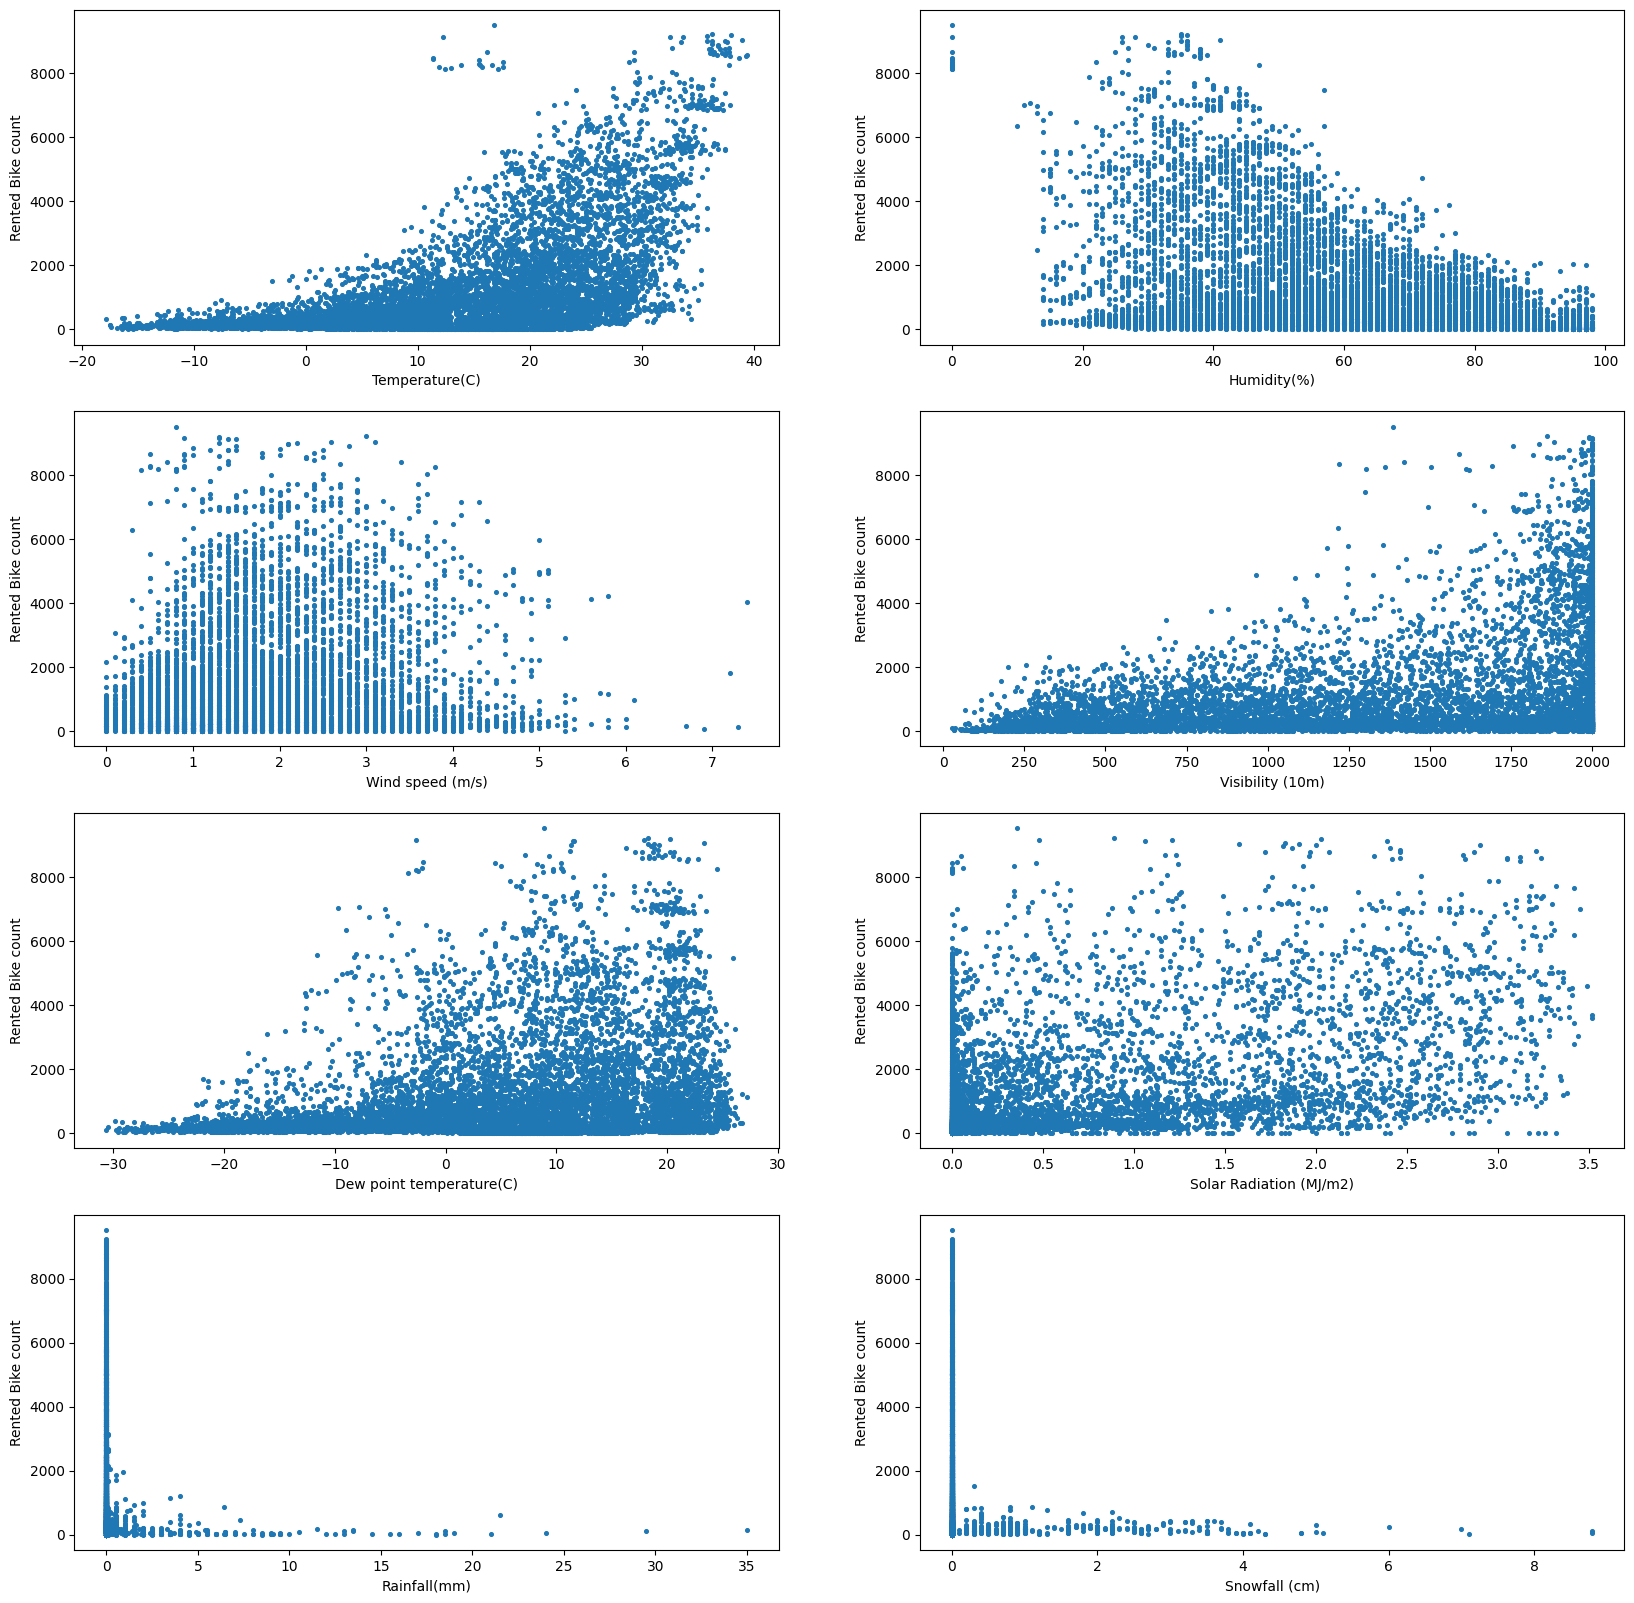

In [81]:
# Plotando os gráficos de dados numéricos (aqueles que tem informação de unidade de medição)

from matplotlib.pyplot import subplots
fig, plt = subplots(nrows=4, ncols=2, figsize=(20,20))

for i in range(4):
    for j in range(2):
        plt[i, j].set_ylabel('Rented Bike count')  

# Temperature
plt[0,0].scatter(bike_data['Temperature(C)'], bike_data['Rented Bike Count'], s=7)
plt[0,0].set_xlabel('Temperature(C)') 

# Humidity
plt[0,1].scatter(bike_data['Humidity(%)'], bike_data['Rented Bike Count'], s=7)
plt[0,1].set_xlabel('Humidity(%)')

# Wind speed (m/s)
plt[1,0].scatter(bike_data['Wind speed (m/s)'], bike_data['Rented Bike Count'], s=7)
plt[1,0].set_xlabel('Wind speed (m/s)')

# Visibility (10m)
plt[1,1].scatter(bike_data['Visibility (10m)'], bike_data['Rented Bike Count'], s=7)
plt[1,1].set_xlabel('Visibility (10m)')

# Dew point temperature(C)
plt[2,0].scatter(bike_data['Dew point temperature(C)'], bike_data['Rented Bike Count'], s=7)
plt[2,0].set_xlabel('Dew point temperature(C)')

# Solar Radiation (MJ/m2)
plt[2,1].scatter(bike_data['Solar Radiation (MJ/m2)'], bike_data['Rented Bike Count'], s=7)
plt[2,1].set_xlabel('Solar Radiation (MJ/m2)')

# Rainfall(mm)
plt[3,0].scatter(bike_data['Rainfall(mm)'], bike_data['Rented Bike Count'], s=7)
plt[3,0].set_xlabel('Rainfall(mm)')

# Snowfall (cm)
plt[3,1].scatter(bike_data['Snowfall (cm)'], bike_data['Rented Bike Count'], s=7)
plt[3,1].set_xlabel('Snowfall (cm)')


## Plotando gráficos : Dados qualitativos / categóricos

Plotando gráficos dos dados que NÃO apresentam unidades de medida, utilizando BOXBLOT

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

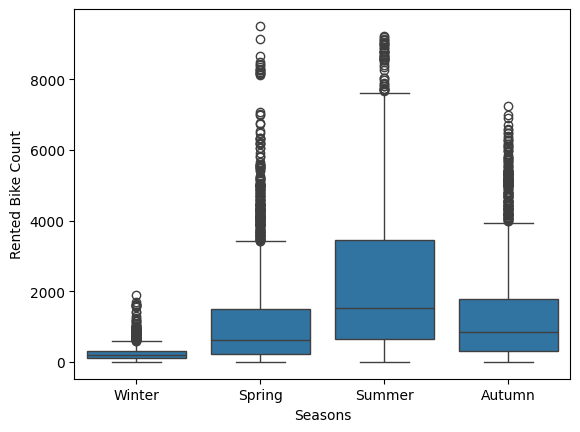

In [107]:
# Plotando os gráficos de dados qualitativos / categóricos (aqueles NÃO que tem informação de unidade de medição)
import seaborn as sns

sns.boxplot(x='Seasons', y='Rented Bike Count', data=bike_data)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

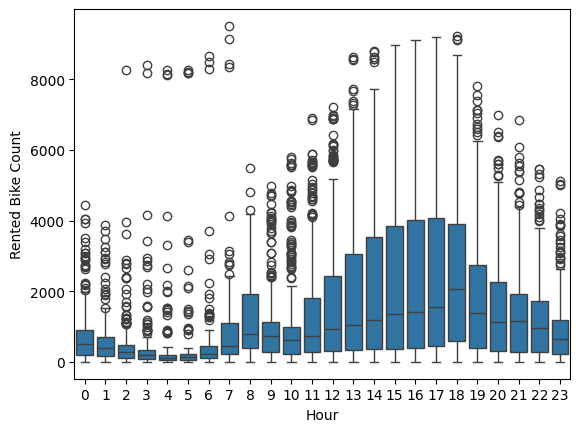

In [94]:
sns.boxplot(x='Hour', y='Rented Bike Count', data=bike_data)



<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

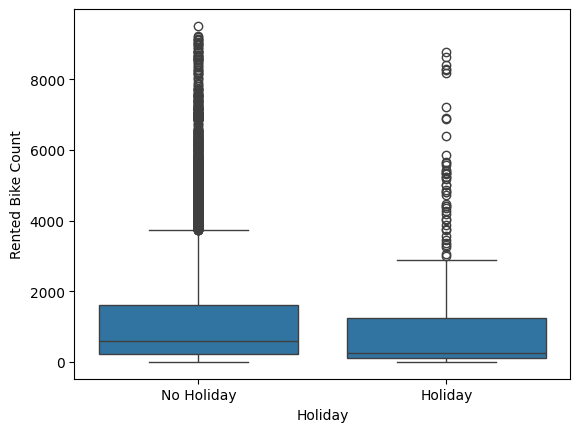

In [110]:
sns.boxplot(x='Holiday', y='Rented Bike Count', data=bike_data)


<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

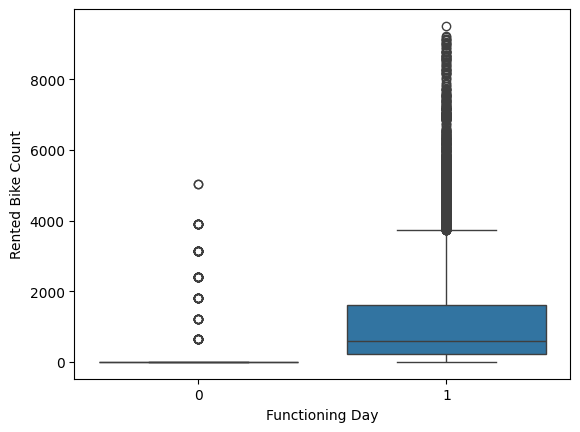

In [97]:
sns.boxplot(x='Functioning Day', y='Rented Bike Count', data=bike_data)

### Transformando Dados Categóricos

Transofrmando dados categóricos em dados para serem utilizados no modelo .
Para isso iremos utilizar a técnica one-hot encoding (which is a way to represent categorical variables as binary vectors).
Pandas has a built-in function called get_dummies() that can be used for one-hot encoding

In [113]:
bike_data = pd.get_dummies(bike_data, columns=['Seasons', 'Holiday', 'Functioning Day'])

**Mutual information**

The mutual information measure is a way to estimate the mutual dependency of two different variables. Therefore, it might be used as an alternative to t- or F-statistic to assess association between a predictor variable $X_i$ and the response variable $Y$.

In that way, we can try to select features in an early stage of the machine learning pipeline, by removing features with low mutual information with the target.

To do this task, use the `mutual_info_regression` function from the Sklearn library. You should pay attention to the *discrete_features* parameter, that should be correctly constructed (all continuous features should be `False` in the array, while others are True). <br/>
The features that are not numbers also need to be converter in order to `mutual_info_regression` to work. To do this you can use Sklearn's [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). This way of encoding is not always appropriate for learning experiments, as ordinal encoding represents a specific order between the categorical values. For the mutual information this is not a problem, but you should not use this encoding for the rest of experiments.

Note: *It is important to notice that this preprocess step has to be done carefully, and is not mandatory for all problems/datasets. The mutual information measure does not take into account the interaction between different features. The basic Linear Regressor also does not use this, so this will most likelly enhance (or at least not worsen) the performance of the model. When using more complex models such as Neural Networks (that we will study in the near future), removing the features that have low direct mutual dependency with the target may worsen our model, as the complex model can find those hidden interactions.*


In [137]:
## check Mutal information
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder

# Calculate mutual information between features and target
X = bike_data.drop(columns=['Rented Bike Count', 'Date']) 
y = bike_data['Rented Bike Count']  # Target variable
mt_info = mutual_info_regression(X, y, discrete_features=[False]*len(X.columns))

# Print the DataFrame to see feature names and their mutual information scores
mi_df = pd.DataFrame(data={'Feature': X.columns, 'Mutual Information': mt_info})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)

                     Feature  Mutual Information
1             Temperature(C)            0.481988
0                       Hour            0.266226
2                Humidity(%)            0.230668
5   Dew point temperature(C)            0.219610
6    Solar Radiation (MJ/m2)            0.198892
12            Seasons_Winter            0.195086
15         Functioning Day_0            0.148292
16         Functioning Day_1            0.138824
4           Visibility (10m)            0.112386
11            Seasons_Summer            0.087103
7               Rainfall(mm)            0.074925
9             Seasons_Autumn            0.063572
8              Snowfall (cm)            0.049080
3           Wind speed (m/s)            0.029708
10            Seasons_Spring            0.017745
14        Holiday_No Holiday            0.008705
13           Holiday_Holiday            0.003263


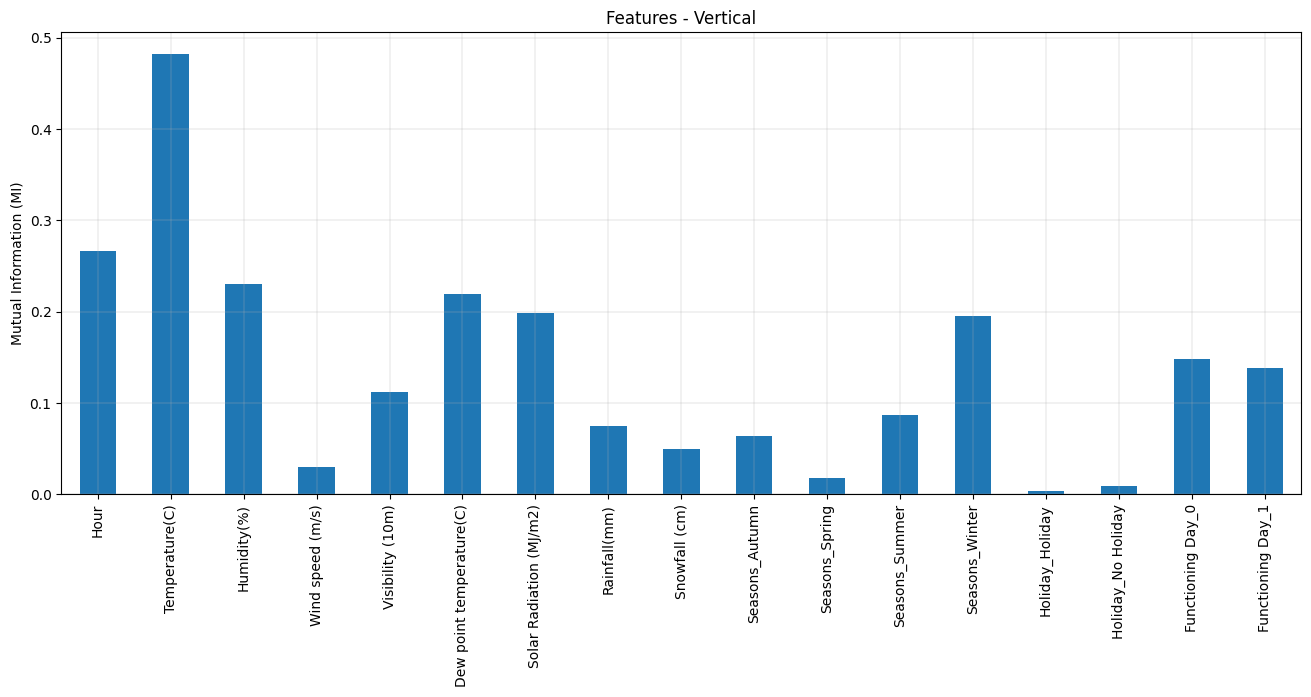

In [138]:
## Visualize the mutual information of each variable (Just run!)
## mt_info is the output of Sklearn function
mt_info_df = pd.Series(mt_info)
mt_info_df.index = X.columns
mt_info_df.plot.bar(figsize = (16,6));
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

In [ ]:
## Adapt the categorical features

# PERGUNTAR PARA O PED

#### Discussion of key points

- How the visualization helped in understanding the data?
- Looking at the mutual information plot, can you find features that seem to be uninfluential? (If so, remember to remove them before next steps!)


- How the visualization helped in understanding the data?

    Analisando os dados plotados podemos ver que certas features apresentam mais influência que outras para o alvo (Rented Bike Count).

    **Sobre os dados quantitativos:**
    - A Temperatura, Humidade e Visibilidade se assemelham a um comportamento linear. Já a Radiação Solar e Velocidade do Vento parecem não ter muita influência no número de bicicletas alugadas. Além disso, a quantidade de chuva ou neve parecem forçar um comportamento binário no aluguel de bicicletas, ou seja , se chover ou nevar o número de alugueis de bicicletas é quase nulo.


    **Sobre os dados qualitativos:**
    - O Horário demonstra ter uma maior atividade no periódo final da tarde-noite (17h - 19h), as Estações Mostram ter uma amior atividade no Verão. Já o Feriado mostra ter uma quantidade maior de bikes alugas quando não é feriado, mas parece não depender muito disso. Agora o Dia de Funcionamento mostra que as bikes só são alugadas caso o estabelecimento esta funcionando.

- Looking at the mutual information plot, can you find features that seem to be uninfluential? (If so, remember to remove them before next steps!)

    Analisando o 'mutual information' conseguimos uma maneira mais racional de entender a dependencia entre duas variáveis. Com isso, fica mais fácil encontrar features que não influenciam ou influencia de forma insignificativa a número de bicicletas alugadas. Entre elas vamos destacar : **Holiday e Wind Speed**.

### **Implement and train the a Linear Regressor** (2.5 points)

You should complete the implementation of the `MyLinearRegressor` class and of the `MSE` loss function started below. No machine learning libraries are allowed for this.

The common regression metrics used to understand model perfomance are the Mean Squared Error (MSE), Mean Absolute Error (MAE) and Coefficient of determination(R²). You can implement your own version of those metrics or use it from sklearn. Compare the different metrics.

In [ ]:
# TODO: MSE Loss. You cannot use machine learning libraries for this!!
def MSE():
  return None

In [ ]:
# TODO: Finish the implementation of MyLinearRegressor.
class MyLinearRegressor():
  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def predict(self, X):
    return None

  def fit(self, X, y):
    return None

#### Discussion of key points

- Looking at the different metrics proposed, what is the best one for this problem?
- Your Linear Regressor was able to closely estimate the amount of bikes rented per hour? Justify using a machine learning metric.
- What do you think is the biggest error type in your model: variance or bias?

*YOUR ANSWER HERE*

### **Compare with SGDRegressor** (0.5 point)

After training your regressor, train a `SGDRegressor` from sklearn and compare both.

In [ ]:
# TODO: Traing the SGDRegressor. You should use sklearn libraries.
from sklearn.linear_model import SGDRegressor

### **EXTRA: Find interaction terms** (0.5 point)

In the "An Introduction to Statistical Learning" book, in chapter 3, the authors explain how different terms can interact with each other, and this interaction can have a bigger correlation with the target.

In this extra task, search for relation of columns that can enhance the results of the model.<br/>
The interaction could be to sum, subtract, multiply or divide two columns by each other. Choose some relations to test between some of the columns. <br/>
To do this, you can use the `mutual_information` technique to test wheter the new columns have bigger Mutual Information.

You should train your own model **not** the Sklearn one.



In [ ]:
# Reload the dataset

In [ ]:
# Transform features

In [ ]:
# Check mutual information

In [ ]:
# Re-train and test the model

## **K-Nearest Neighbors (KNN) Classifier**

In this section you must load and explore the dataset, and train a K-Nearest Neighbors (KNN) classifier. You can (and should) use the Sklearn library to it.

Remember to avoid using data that you should not have in training when performing the data analysis.

#### **Dataset: In-vehicle coupon recommendation**

This dataset was built using Amazon Mechanical Turk, which is a tool to apply surveys to a specific range of users.

The applied survey was made by asking user for demographic informations, and then presenting 20 driving scenarios and possible coupon offers.
<br/>
The users had to answer if they would want the coupon or not.

The focus of this dataset was to understand how to correct apply advertsiment of in-vehicle coupons.

Features and the corresponding descriptions:
- **destination**: Destination of the driving scenario. Options: No Urgent Place, Home, Work
- **passanger**: People in the car of the driving scenario. Options: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- **weather**: Weather of the driving scenario. Options: Sunny, Rainy, Snowy
- **temperature**: Temperature of the driving scenario. Options: 55, 80, 30
- **time**: Hour of the driving scenario. Options: 2PM, 10AM, 6PM, 7AM, 10PM
- **coupon**: Type of coupon offered. Options:
  - Restaurant(< \\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\\$20-\\$50)
- **expiration**: Expiration of the coupon in the scenario. Options: 1d, 2h (the coupon expires in 1 day or in 2 hours)
- **gender**: Gender of the person answering the survey. Options: Female, Male
- **age**: Age of the person answering the survey. Options: 21, 46, 26, 31, 41, 50plus, 36, below21
- **maritalStatus**: Marital status of the person answering the survey. Options: Unmarried partner, Single, Married partner, Divorced, Widowed
- **has_Children**: If the person answering the survey has children. Options:1, 0
- **education**: Edducation level of the person answering the survey. Options: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
- **ocupation**: Ocupation of the person answering the survey. Options:
  - Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
- **income**: Anual income of the person answering the survey. Options:
  - \\$37500 - \\$49999, \\$62500 - \\$74999, \\$12500 - \\$24999, \\$75000 - \\$87499, \\$50000 - \\$62499, \\$25000 - \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
- **Bar**: Question: how many times do you go to a bar every month? Options: never, less1, 1\~3, 4\~8, gt8, nan
- **CoffeeHouse**: Question: how many times do you go to a coffeehouse every month? never, less1, 4\~8, 1\~3, gt8,  nan
- **CarryAway**: Question: how many times do you get take-away food every month? Options: n4\~8, 1\~3, gt8, less1, never
- **RestaurantLessThan20**: Question: how many times do you go to a restaurant with an average expense per person of less than $20 every month? Options: 4\~8, 1\~3, less1, gt8,  never
- **Restaurant20To50**: Question: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month? Options: 1\~3, less1, never, gt8, 4\~8,  nan
- **toCoupon_GEQ15min**: Indicator if the driving distance to the restaurant/bar for using the coupon is greater than 15 minutes in the driving scenario. Options: 0,1
- **toCoupon_GEQ25min**: Indicator if the driving distance to the restaurant/bar for using the coupon is greater than 25 minutes in the driving scenario. Options: 0,1
- **direction_same**:  Indicator whether the restaurant/bar is in the same direction as your current destination in the driving scenario. Options: 0,1
- **direction_opp**: Indicator whether the restaurant/bar is in the opposite direction as your current destination. Options: 1, 0
- **Y**: Wheter the coupon was accepted. Options: 1, 0

**How to load the dataset**

As you already copied the folder in the first part of this task, you can just directly load the dataset.

*If you want to run the notebook locally, change the path below to the location of the folder in your local environment.*

In [ ]:
# link with google drive, remove comments if need to restart from this step.
import pandas as pd
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "in-vehicle-coupon-recommendation.csv" # Change this to be the correct path if you added the dataset in a different location

df = pd.read_csv(path)

### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset.
This should be done as in the Linear Regressor section, paying attention to mutual information (now using [`mutual_info_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)) and categorical features.

Check for missing values before changing the dataset and explore how to deal with them (removing? filling with mean/median/random? Etc).

Remember that machine learning models are highly affected by the scale of the input features.


#### Discussion of key points

- There were missing values in the dataset? How did you dealt with each one?
- Changing the missing values impacted in the mutual information of features with the target?

*YOUR ANSWER HERE*

### **Train a K-Nearest Neighbors Classifier** (2.5 points)


You should use the Sklearn `KNeighborsClassifier` function to fit the data.

You can use different metrics such as accuracy and f1-score from Sklearn (or create your own implementation) to understand the model's performance.

Also, plot a confusion matrix to analyze the results.
A Confusion matrix is a matrix were the columns represent the true label, and rows represent the predicted label. As this is a binary classification task, the matrix should have 2x2. You can study more about it [here](https://en.wikipedia.org/wiki/Confusion_matrix). You can use sklearn functions that help in building and displaying it.

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- What was the best K for this problem? How the selection o K impacts the Bias-variance tradeoff?

*YOUR ANSWER HERE*

## **Multiclass classification** (1 point)

In this last section you should adapt the "**Seoul Bike Sharing Demand**" dataset target, creating an arbitrary number N of classes, where 2 < N < 11.

Classes should represent equally spaced intervals in the continuous target of the original dataset(`Rented Bike count`).<br/>
For example, if N == 3, we should have 3 classes. Given that $\hat{x}$ is the maximum value of the known `Rented Bike count` in train dataset, samples with y <= $\hat{x}/3$ should be of class 0, samples y > $\hat{x}/3$ but y <= $2*\hat{x}/3$ should be of class 1, and samples where y > $2*\hat{x}/3$ should be of class 2.

You can use the Sklearn KNN classifier for this task, as well as any sklearn helper functions. Remember to carefully perform the needed preprocess steps discussed in other sections (if necessary).

Plot a confusion matrix with the results.

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- There is value in solve a regression problem as a multiclass classification problem?

*YOUR ANSWER HERE*